<a href="https://colab.research.google.com/github/18ME10049/Projects/blob/master/Multi_Linear_Reg(Project_on_Coursera)%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Evaluate multiple linear regression models using Python***

Predict sales revenue based on advertising spending through media such as TV, radio, and newspaper.


Task-1
**Importing Library**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inline



In [12]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

Task-2
**Load Data**

In [15]:
advert = pd.read_csv("Advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Task-3
**Relationship between Features and Responce**

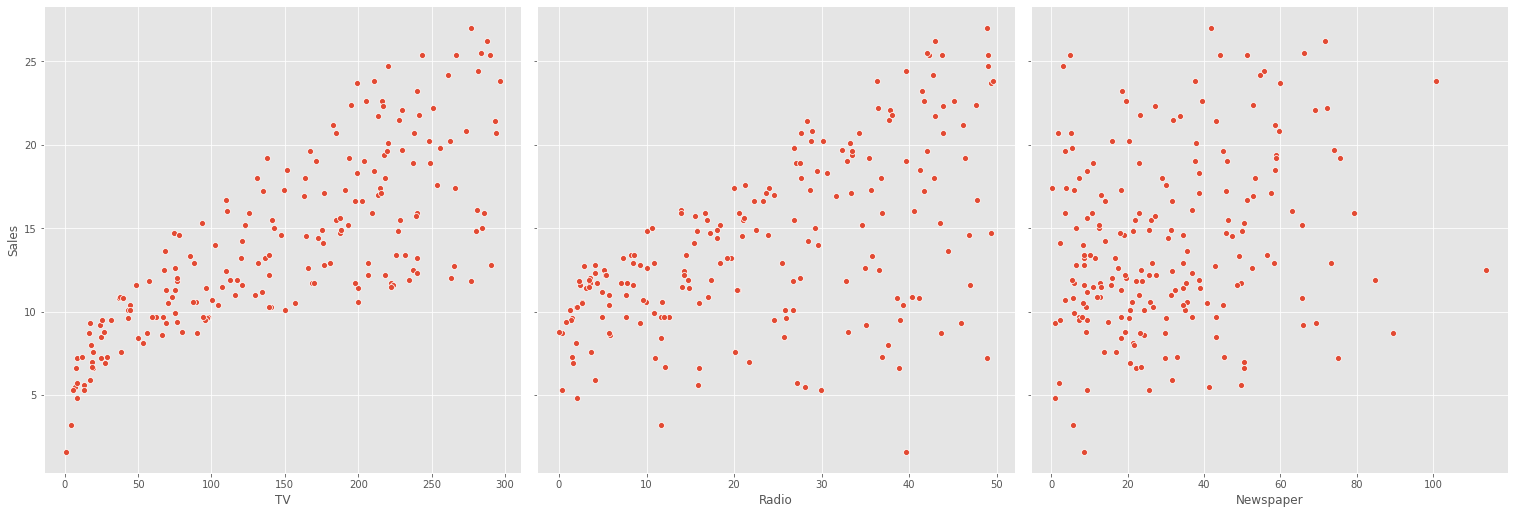

In [21]:
sns.pairplot(advert, x_vars = ['TV' , 'Radio' , 'Newspaper'] , y_vars=['Sales'] , palette = 'spring'  , height=7)

Task-4

**Multiple** **Linear** **Regression**
**EstimatingCoefficients**

In [25]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression();
x = advert.iloc[: , :-1]
y = advert.iloc[:  , -1:]
lm1.fit(x,y)

print(lm1.intercept_)
print(lm1.coef_)

[2.93888937]
[[ 0.04576465  0.18853002 -0.00103749]]


In [29]:
list(zip(['TV','Radio','Newspaper'] , lm1.coef_))
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


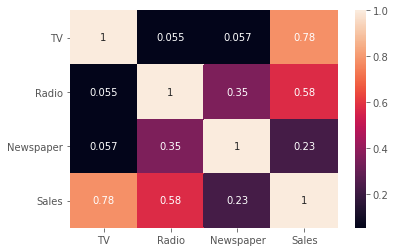

In [34]:
sns.heatmap(advert.corr() , annot=True)  ## it stats why we cant apply we seperate simple linear regression on each feature because there is feature dependecies is there

Task - 5
**Feature Selection**




In [44]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(x[['TV','Radio'] ], y)
lm2_pred = lm2.predict(x[['TV' , 'Radio']]);

print("r^2 score = " , r2_score(y,lm2_pred))

r^2 score =  0.8971942610828957


In [45]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(x[['TV','Radio','Newspaper'] ], y)
lm2_pred = lm2.predict(x[['TV' , 'Radio','Newspaper']]);

print("r^2 score = " , r2_score(y,lm2_pred))

r^2 score =  0.8972106381789522


Task - 6

**Model Evaluation using Train-Test split**

**Mean Absolute Error :**(MAE) is the mean of the absolute value of error


**Mean Squared Error (MSE)**is the mean of the squaered errors

**Root Mean Squared Erro (RMSE)** is the mean of the squared erro

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y = advert.Sales
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state = 1 , test_size = 0.4)

lm4 = LinearRegression().fit(x_train , y_train)
lm4_preds = lm4.predict(x_test)

print("RMSE :" , np.sqrt(mean_squared_error(y_test,lm4_preds)))
print("R2_score :" ,r2_score(y_test , lm4_preds))

RMSE : 1.5635772207961516
R2_score : 0.9143968806980323


In [64]:
X = advert[['TV','Radio']]
x_train , x_test , y_train , y_test = train_test_split(X,y , random_state = 1 , test_size = 0.4)

lm5 = LinearRegression().fit(x_train , y_train)
lm5_preds = lm5.predict(x_test)

print("RMSE :" , np.sqrt(mean_squared_error(y_test,lm5_preds)))
print("R2_score :" ,r2_score(y_test , lm5_preds))

RMSE : 1.5576796054790363
R2_score : 0.9150414310760966


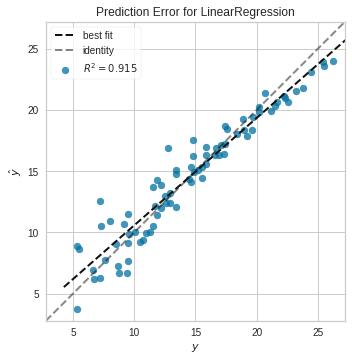

In [65]:
from yellowbrick.regressor import PredictionError , ResidualsPlot
visualizer = PredictionError(lm5.fit(x_train,y_train))
visualizer.score(x_test,y_test)
visualizer.poof()


Task - 7

**Synergy Effect(Interection effect)**

In [66]:
advert['Interection']  = advert['TV'] * advert['Radio']

X = advert[['TV' ,'Radio' , 'Interection']]

x_train , x_test , y_train , y_test = train_test_split(X,y , random_state = 1 , test_size = 0.4)

lm6 = LinearRegression().fit(x_train , y_train)
lm6_preds = lm6.predict(x_test)

print("RMSE :" , np.sqrt(mean_squared_error(y_test,lm6_preds)))
print("R2_score :" ,r2_score(y_test , lm6_preds))

RMSE : 0.8156464814498595
R2_score : 0.9767054215879347


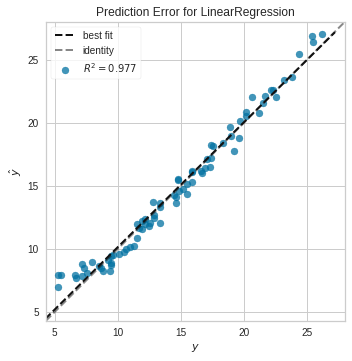

In [67]:
from yellowbrick.regressor import PredictionError , ResidualsPlot

visualizer  = PredictionError(lm6.fit(x_train,y_train))
visualizer.score(x_test,y_test)
visualizer.poof()

By the end of this project, I am able to:

- Build univariate and multivariate linear regression models using scikit-learn
- Perform Exploratory Data Analysis (EDA) and data visualization with seaborn
- Evaluate model fit and accuracy using numerical measures such as R² and RMSE
- Model interaction effects in regression using basic feature engineering techniques